# Alireza Mohammadshafie

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.datasets import load_diabetes  
from sklearn.metrics import mean_squared_error  



In [2]:
diabetes = load_diabetes() 
X = diabetes.data[:, 0].reshape(-1, 1)  
y = diabetes.target  
print('this is x' , X)
print('this is label(Y)' , y)

this is x [[ 0.03807591]
 [-0.00188202]
 [ 0.08529891]
 [-0.08906294]
 [ 0.00538306]
 [-0.09269548]
 [-0.04547248]
 [ 0.06350368]
 [ 0.04170844]
 [-0.07090025]
 [-0.09632802]
 [ 0.02717829]
 [ 0.01628068]
 [ 0.00538306]
 [ 0.04534098]
 [-0.05273755]
 [-0.00551455]
 [ 0.07076875]
 [-0.0382074 ]
 [-0.02730979]
 [-0.04910502]
 [-0.0854304 ]
 [-0.0854304 ]
 [ 0.04534098]
 [-0.06363517]
 [-0.06726771]
 [-0.10722563]
 [-0.02367725]
 [ 0.05260606]
 [ 0.06713621]
 [-0.06000263]
 [-0.02367725]
 [ 0.03444337]
 [ 0.03081083]
 [ 0.01628068]
 [ 0.04897352]
 [ 0.01264814]
 [-0.00914709]
 [-0.00188202]
 [-0.00188202]
 [ 0.00538306]
 [-0.09996055]
 [-0.06000263]
 [ 0.01991321]
 [ 0.04534098]
 [ 0.02717829]
 [-0.05637009]
 [-0.07816532]
 [ 0.06713621]
 [-0.04183994]
 [ 0.03444337]
 [ 0.05987114]
 [-0.05273755]
 [-0.00914709]
 [-0.04910502]
 [-0.04183994]
 [-0.04183994]
 [-0.02730979]
 [ 0.04170844]
 [ 0.06350368]
 [-0.07090025]
 [-0.04183994]
 [-0.02730979]
 [-0.03457486]
 [ 0.06713621]
 [-0.04547248]


In [3]:
# Split data into training and test set

X_train, X_test = X[:40], X[-40:]  
y_train, y_test = y[:40], y[-40:]  

print("Training samples:", X_train.shape[0],X_train)  
print("Testing samples:", X_test.shape[0],X_test) 
print("Training target:", y_train.shape[0],y_train)  
print("Testing target:", y_test.shape[0],y_test) 

Training samples: 40 [[ 0.03807591]
 [-0.00188202]
 [ 0.08529891]
 [-0.08906294]
 [ 0.00538306]
 [-0.09269548]
 [-0.04547248]
 [ 0.06350368]
 [ 0.04170844]
 [-0.07090025]
 [-0.09632802]
 [ 0.02717829]
 [ 0.01628068]
 [ 0.00538306]
 [ 0.04534098]
 [-0.05273755]
 [-0.00551455]
 [ 0.07076875]
 [-0.0382074 ]
 [-0.02730979]
 [-0.04910502]
 [-0.0854304 ]
 [-0.0854304 ]
 [ 0.04534098]
 [-0.06363517]
 [-0.06726771]
 [-0.10722563]
 [-0.02367725]
 [ 0.05260606]
 [ 0.06713621]
 [-0.06000263]
 [-0.02367725]
 [ 0.03444337]
 [ 0.03081083]
 [ 0.01628068]
 [ 0.04897352]
 [ 0.01264814]
 [-0.00914709]
 [-0.00188202]
 [-0.00188202]]
Testing samples: 40 [[ 0.11072668]
 [-0.02004471]
 [-0.01641217]
 [ 0.04897352]
 [-0.05637009]
 [ 0.02717829]
 [ 0.06350368]
 [-0.05273755]
 [-0.00914709]
 [ 0.00538306]
 [ 0.07440129]
 [-0.05273755]
 [ 0.08166637]
 [-0.00551455]
 [-0.02730979]
 [-0.05273755]
 [ 0.0090156 ]
 [-0.02004471]
 [ 0.02354575]
 [ 0.03807591]
 [-0.07816532]
 [ 0.0090156 ]
 [ 0.00175052]
 [-0.07816532

In [4]:
def ols_fit(X, y):  
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  
    beta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y  
    return beta  

def ols_predict(X, beta):  
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  
    return X_bias @ beta  

beta_ols = ols_fit(X_train, y_train)  
y_pred_ols = ols_predict(X_test, beta_ols)  

# Calculate MSE  
mse_ols = mean_squared_error(y_test, y_pred_ols)  

print("OLS Coefficients:", beta_ols)  
print("OLS Mean Squared Error:", mse_ols)  

OLS Coefficients: [149.94060574 142.14820865]
OLS Mean Squared Error: 5547.6208521530625


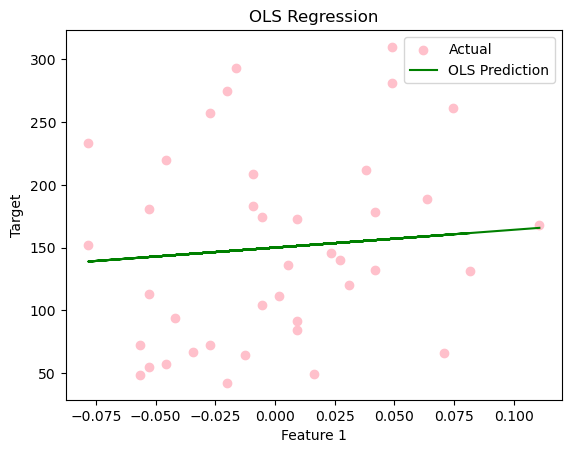

In [5]:
#plot it

plt.scatter(X_test, y_test, label="Actual", color= 'pink')  
plt.plot(X_test, y_pred_ols, color='green', label="OLS Prediction")  
plt.xlabel("Feature 1")  
plt.ylabel("Target")  
plt.title("OLS Regression")  
plt.legend()  
plt.show()  

Lasso Coefficients (alpha=0.01): [149.94017248 142.10392022]
Lasso Mean Squared Error: 5547.660528394781


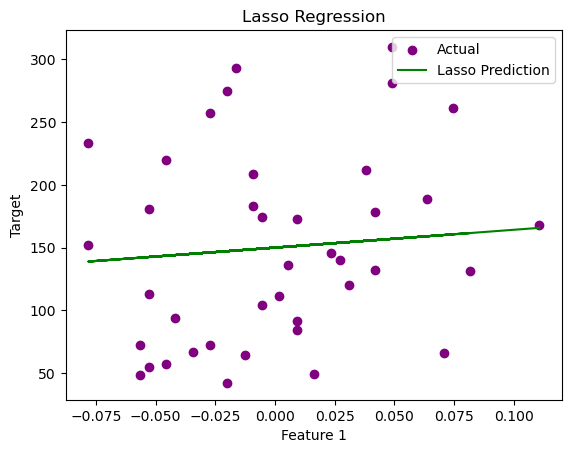

In [6]:
def lasso_fit(X, y, alpha, num_iter=1000, lr=0.01):  
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  
    beta = np.zeros(X_bias.shape[1])  

    for _ in range(num_iter):  
        error = y - X_bias @ beta  
        beta[0] += lr * np.sum(error)  

        for j in range(1, len(beta)):  
            ro = X_bias[:, j].T @ (y - X_bias @ beta + beta[j] * X_bias[:, j])  
            if ro < -alpha / 2:  
                beta[j] = (ro + alpha / 2) / (X_bias[:, j]**2).sum()  
            elif ro > alpha / 2:  
                beta[j] = (ro - alpha / 2) / (X_bias[:, j]**2).sum()  
            else:  
                beta[j] = 0  
    return beta  

alpha = 0.01  # Regularization parameter 
beta_lasso = lasso_fit(X_train, y_train, alpha)  
y_pred_lasso = ols_predict(X_test, beta_lasso)  
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  

print("Lasso Coefficients (alpha=0.01):", beta_lasso)  
print("Lasso Mean Squared Error:", mse_lasso)  
#plotting
plt.scatter(X_test, y_test, label="Actual", color ='purple')  
plt.plot(X_test, y_pred_lasso, color='green', label="Lasso Prediction")  
plt.xlabel("Feature 1")  
plt.ylabel("Target")  
plt.title("Lasso Regression")  
plt.legend()  
plt.show()  

Ridge Coefficients (alpha=0.1): [149.28742126  75.37946082]
Ridge Mean Squared Error: 5617.113968866777


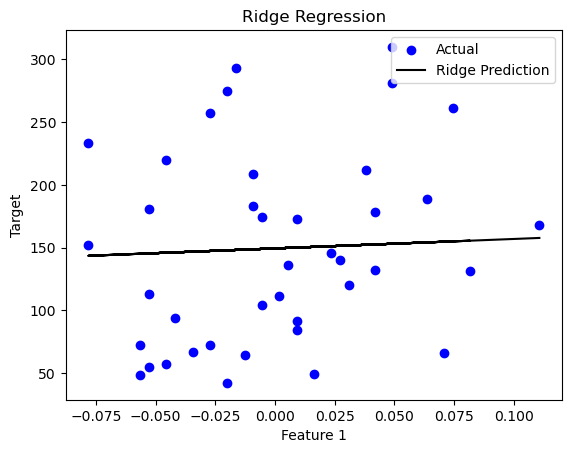

In [7]:
def ridge_fit(X, y, alpha):  
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  
    identity = np.eye(X_bias.shape[1])  
    identity[0, 0] = 0  
    beta = np.linalg.inv(X_bias.T @ X_bias + alpha * identity) @ X_bias.T @ y  
    return beta  

alpha_ridge = 0.1  # Regularization parameter that we can change  
beta_ridge = ridge_fit(X_train, y_train, alpha_ridge)  
y_pred_ridge = ols_predict(X_test, beta_ridge)  
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  

print("Ridge Coefficients (alpha=0.1):", beta_ridge)  
print("Ridge Mean Squared Error:", mse_ridge)  
# plot it!
plt.scatter(X_test, y_test, label="Actual",color="blue")  
plt.plot(X_test, y_pred_ridge, color='black', label="Ridge Prediction")  
plt.xlabel("Feature 1")  
plt.ylabel("Target")  
plt.title("Ridge Regression")  
plt.legend()  
plt.show()  

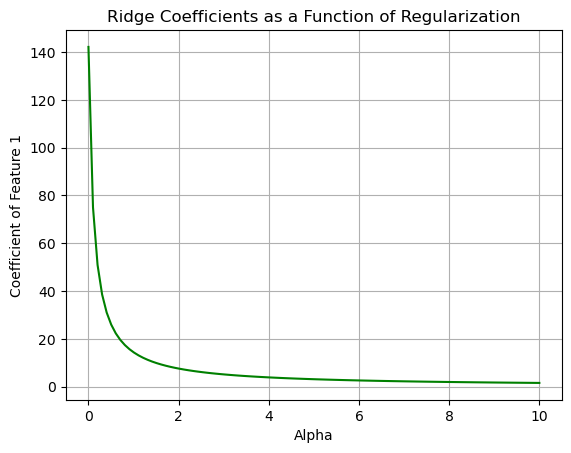

In [8]:
alphas = np.linspace(0, 10, 100)  
coefs = []  

for alpha in alphas:  
    beta = ridge_fit(X_train, y_train, alpha)  
    coefs.append(beta[1])  

plt.plot(alphas, coefs, color='green')  
plt.xlabel("Alpha")  
plt.ylabel("Coefficient of Feature 1")  
plt.title("Ridge Coefficients as a Function of Regularization")  
plt.grid(True)  
plt.show()  